# Exploratory Data Analysis on the test data and test results



## Test Data
The script will analyze basic statistics, word counts, and distributions to provide insights into the dataset before applying any summarization models.

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datasets import load_dataset
from wordcloud import WordCloud

# Load the CNN/DailyMail dataset
dataset = load_dataset('cnn_dailymail', '3.0.0', split='test')

# Convert to DataFrame for easier manipulation
df = pd.DataFrame(dataset)
df



,article,highlights,id
0,(CNN)The Palestinian Authority officially beca...,Membership gives the ICC jurisdiction over all...,f001ec5c4704938247d27a44948eebb37ae98d01
1,(CNN)Never mind cats having nine lives. A stra...,"Theia, a bully breed mix, was apparently hit b...",230c522854991d053fe98a718b1defa077a8efef
2,"(CNN)If you've been following the news lately,...",Mohammad Javad Zarif has spent more time with ...,4495ba8f3a340d97a9df1476f8a35502bcce1f69
3,(CNN)Five Americans who were monitored for thr...,17 Americans were exposed to the Ebola virus w...,a38e72fed88684ec8d60dd5856282e999dc8c0ca
4,(CNN)A Duke student has admitted to hanging a ...,Student is no longer on Duke University campus...,c27cf1b136cc270023de959e7ab24638021bc43f
...,...,...,...
11485,Telecom watchdogs are to stop a rip-off that a...,Operators are charging up to 20p a minute - ev...,0ac776a4dc09ca97c136f4314fed4defb48a361a
11486,The chilling reenactment of how executions are...,Bali Nine ringleaders will face the firing squ...,fe89a6a2e28d173e5ad4c6d814c15b95aa969e3f
11487,It is a week which has seen him in deep water ...,Hardy was convicted of domestic abuse against ...,ded2f535cd6ab95d11b5f4ea29bbf2b2d3c55c50
11488,"Despite the hype surrounding its first watch, ...",Apple sold more than 61 million iPhones in the...,30ec5f280eee772a73d181bfc8514defd8026434


In [6]:

# Basic Information about the dataset
print("Dataset Information:")
df.info()

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11490 entries, 0 to 11489
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   article     11490 non-null  object
 1   highlights  11490 non-null  object
 2   id          11490 non-null  object
dtypes: object(3)
memory usage: 269.4+ KB


In [10]:

# Average length of article and highlight
df['article_length'] = df['article'].apply(lambda x: len(x.split()))
df['highlight_length'] = df['highlights'].apply(lambda x: len(x.split()))

print("\nAverage lengths of articles and highlights:")
print("Average article length:", df['article_length'].mean())
print("Average highlight length:", df['highlight_length'].mean())





Average lengths of articles and highlights:
Average article length: 683.5115752828547
Average highlight length: 55.00931244560488


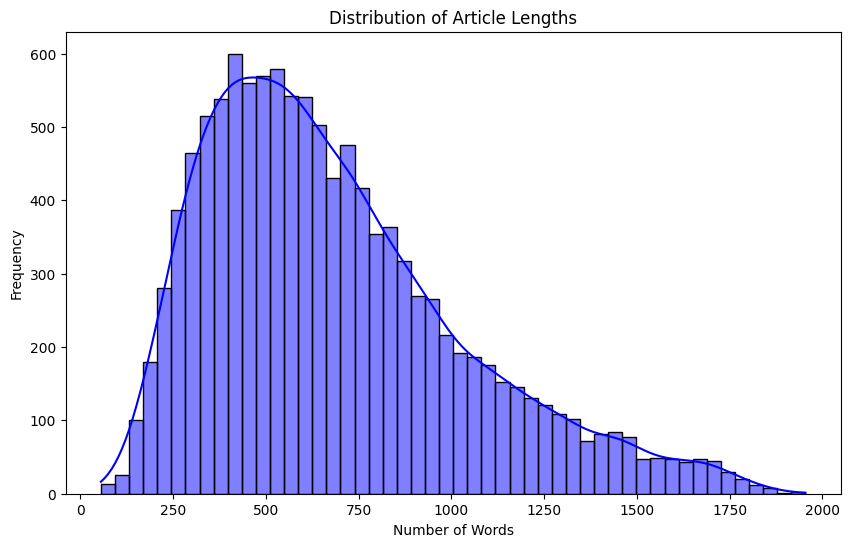

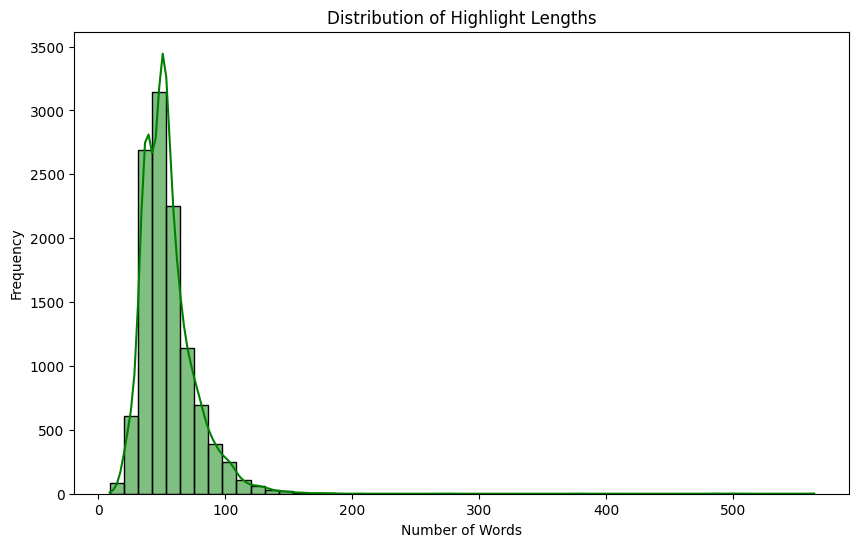

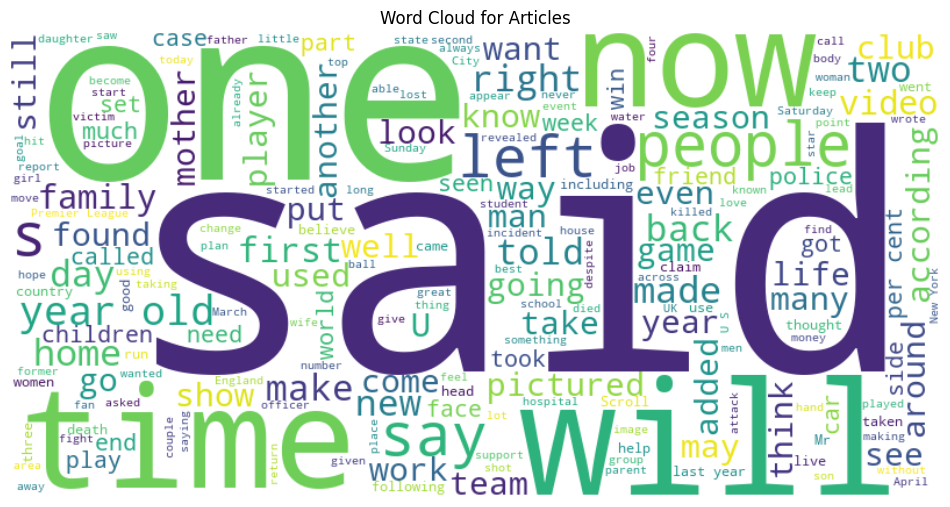

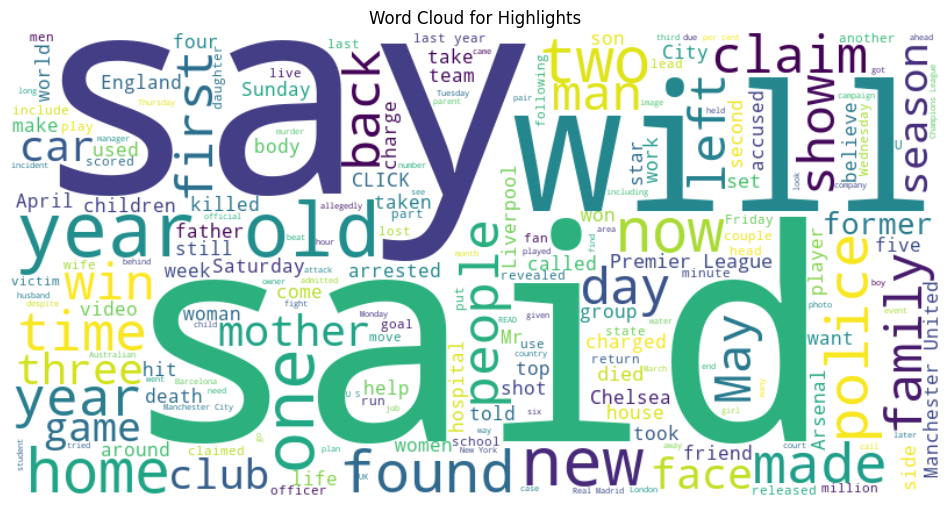

In [11]:

# Distribution of article lengths
plt.figure(figsize=(10, 6))
sns.histplot(df['article_length'], kde=True, color='blue', bins=50)
plt.title('Distribution of Article Lengths')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.show()

# Distribution of highlight lengths
plt.figure(figsize=(10, 6))
sns.histplot(df['highlight_length'], kde=True, color='green', bins=50)
plt.title('Distribution of Highlight Lengths')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.show()

# Word Cloud for the 'article' column
plt.figure(figsize=(12, 8))
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(" ".join(df['article']))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Articles')
plt.axis('off')
plt.show()

# Word Cloud for the 'highlights' column
plt.figure(figsize=(12, 8))
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(" ".join(df['highlights']))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Highlights')
plt.axis('off')
plt.show()


Top 10 most frequent words in Articles:
the: 448413
to: 215078
a: 196293
and: 185060
of: 174613
in: 162907
s: 83715
was: 76833
for: 75938
on: 75237

Top 10 most frequent words in Highlights:
the: 25444
to: 15258
in: 13932
a: 12189
and: 11867
of: 11503
on: 7055
was: 6715
for: 6510
s: 5957


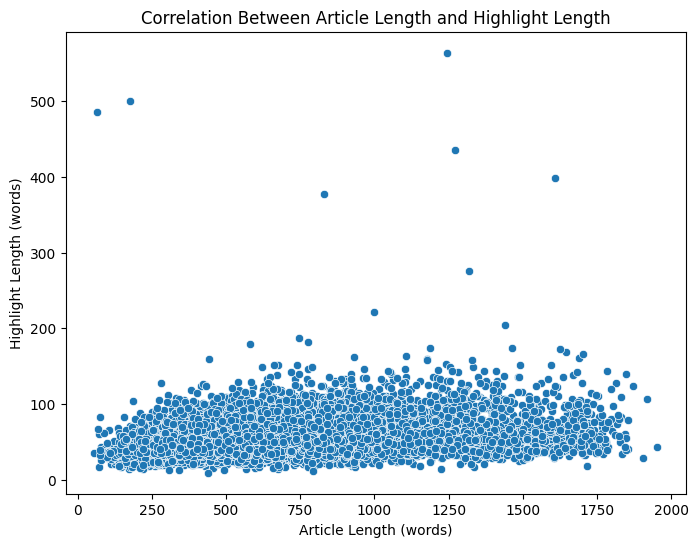

In [13]:
# Top 10 most frequent words in articles
from collections import Counter
import re

def get_most_frequent_words(texts, top_n=10):
    words = " ".join(texts).lower()
    words = re.findall(r'\b\w+\b', words)
    word_counts = Counter(words)
    return word_counts.most_common(top_n)

top_10_article_words = get_most_frequent_words(df['article'])
top_10_highlight_words = get_most_frequent_words(df['highlights'])

print("\nTop 10 most frequent words in Articles:")
for word, count in top_10_article_words:
    print(f"{word}: {count}")

print("\nTop 10 most frequent words in Highlights:")
for word, count in top_10_highlight_words:
    print(f"{word}: {count}")

# Correlation between article and highlight lengths
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['article_length'], y=df['highlight_length'])
plt.title('Correlation Between Article Length and Highlight Length')
plt.xlabel('Article Length (words)')
plt.ylabel('Highlight Length (words)')
plt.show()


In [15]:

# Check for missing values
missing_values = df.isnull().sum()
print("\nMissing values in each column:")
print(missing_values)

# # Save the results of EDA
# output_dir = r"summariserAI\quicknote-summarizer\src\eda_results"
# if not os.path.exists(output_dir):
#     os.makedirs(output_dir)

# # Save the dataframe to CSV
# # df.to_csv(os.path.join(output_dir, 'cnn_dailymail_test_eda.csv'), index=False)


Missing values in each column:
article             0
highlights          0
id                  0
article_length      0
highlight_length    0
dtype: int64


## Results 

In [ ]:
!pip install bert-score


In [1]:
import pandas as pd
from bert_score import score
import matplotlib.pyplot as plt
import seaborn as sns

d:\projects\MLflow_project\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
df_results = pd.read_csv(r"D:\projects\summariserAI\quicknote-summarizer\src\results\evaluation_results_v3.csv")
df_results.sample(5)


,original_text,summarized_text,model_name,rouge1_f1,rouge2_f1,rougeL_f1,rougeLsum_f1,rouge_avg,response_time,original_text_word_count,summarized_text_word_count
157,Military officials in Kazakhstan have introduc...,pictures show 123 of the country's prettiest f...,t5-large,0.160000,0.027397,0.080000,0.133333,0.100183,31.145773,688,37
93,Rafa Nadal got his clay court season off to a ...,"Rafael Nadal beat Lucas Pouille 6-2, 6-1 in th...",facebook/bart-large-cnn,0.292135,0.229885,0.292135,0.292135,0.276572,11.359353,337,41
106,Arsene Wenger admits he is concerned Theo Walc...,arsene wenger admits he is concerned by theo W...,t5-large,0.523810,0.268293,0.261905,0.428571,0.370645,33.935492,859,35
188,A contestant on Friday night's episode of Jeop...,the first contestant to press his buzzer was T...,t5-large,0.487805,0.314050,0.373984,0.439024,0.403716,46.058729,311,48
165,A Hollywood-inspired experiment to help dement...,the idea is borrowed from the 2004 film 50 fir...,t5-large,0.418182,0.203704,0.200000,0.327273,0.287290,55.315395,694,67


In [3]:
# Step 1: Add BERTScore (Precision, Recall, F1)
def calculate_bertscore(df):
    bert_precision, bert_recall, bert_f1 = score(
        df['summarized_text'].tolist(), 
        df['original_text'].tolist(), 
        lang="en", 
        verbose=True
    )
    df['bertscore_precision'] = bert_precision
    df['bertscore_recall'] = bert_recall
    df['bertscore_f1'] = bert_f1
    return df

df_results = calculate_bertscore(df_results)

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


100%|██████████| 8/8 [04:20<00:00, 32.58s/it]


computing greedy matching.


100%|██████████| 7/7 [00:01<00:00,  5.44it/s]


done in 261.97 seconds, 1.53 sentences/sec


In [4]:
df_results['input_length_category'] = pd.qcut(df_results['original_text_word_count'], 4, labels=['short', 'medium', 'long', 'very_long'])


### Step 2: Creative Analysis

#### (A) Sort models by fastest response time

In [5]:

fastest_models = df_results.groupby('model_name')['response_time'].mean().sort_values()
print("Models sorted by average response time:")
print(fastest_models)

Models sorted by average response time:
model_name
Falconsai/text_summarization     4.525038
google/pegasus-xsum             15.543998
facebook/bart-large-cnn         20.161983
t5-large                        43.419258
Name: response_time, dtype: float64


#### (B) Models with high scores for rows with higher input lengths


In [6]:
# ROUGE F1 Score Analysis
rouge_by_length = df_results.groupby(['model_name', 'input_length_category'])['rouge_avg'].mean().unstack()
print("\nAverage ROUGE F1 by input length category:")
print(rouge_by_length)

# BERTScore F1 Analysis
bertscore_by_length = df_results.groupby(['model_name', 'input_length_category'])['bertscore_f1'].mean().unstack()
print("\nAverage BERTScore F1 by input length category:")
print(bertscore_by_length)


Average ROUGE F1 by input length category:
input_length_category            short    medium      long  very_long
model_name                                                           
Falconsai/text_summarization  0.332883  0.344266  0.243496   0.235256
facebook/bart-large-cnn       0.325297  0.360846  0.258766   0.307476
google/pegasus-xsum           0.184001  0.177836  0.126421   0.185066
t5-large                      0.305332  0.352025  0.246786   0.270453

Average BERTScore F1 by input length category:
input_length_category            short    medium      long  very_long
model_name                                                           
Falconsai/text_summarization  0.878216  0.873347  0.868351   0.869096
facebook/bart-large-cnn       0.882556  0.875709  0.873374   0.868261
google/pegasus-xsum           0.844983  0.837759  0.831677   0.837989
t5-large                      0.859876  0.857522  0.853339   0.846982


C:\Users\dell\AppData\Local\Temp\ipykernel_14900\3216528819.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  rouge_by_length = df_results.groupby(['model_name', 'input_length_category'])['rouge_avg'].mean().unstack()
C:\Users\dell\AppData\Local\Temp\ipykernel_14900\3216528819.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bertscore_by_length = df_results.groupby(['model_name', 'input_length_category'])['bertscore_f1'].mean().unstack()


### Step 3: Visualization

#### (1) Average BERTScore F1 by Model



<Figure size 1200x600 with 0 Axes>

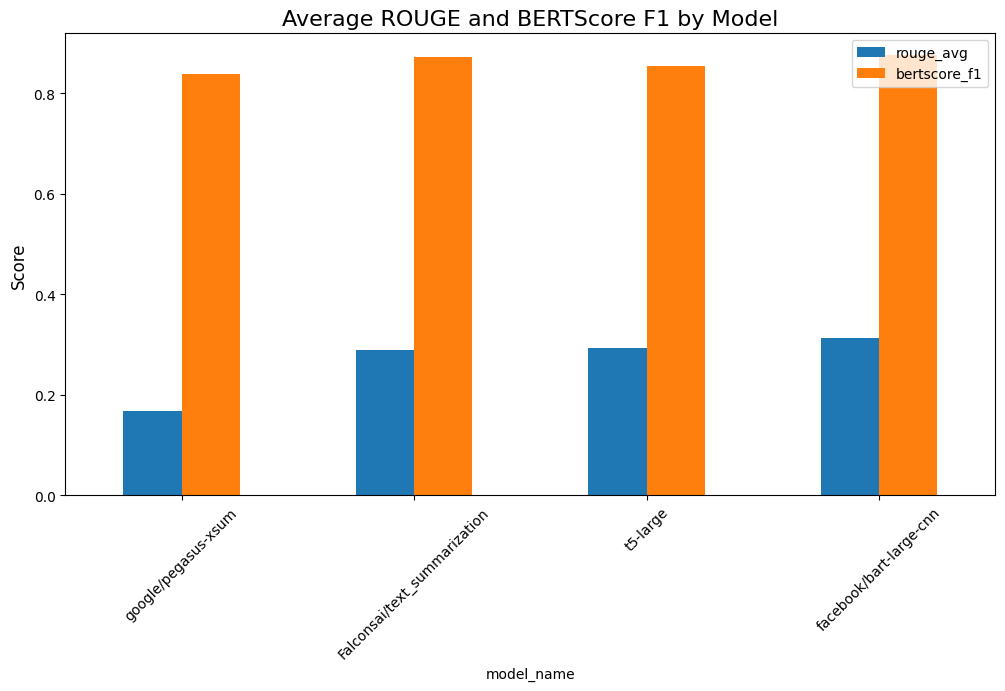

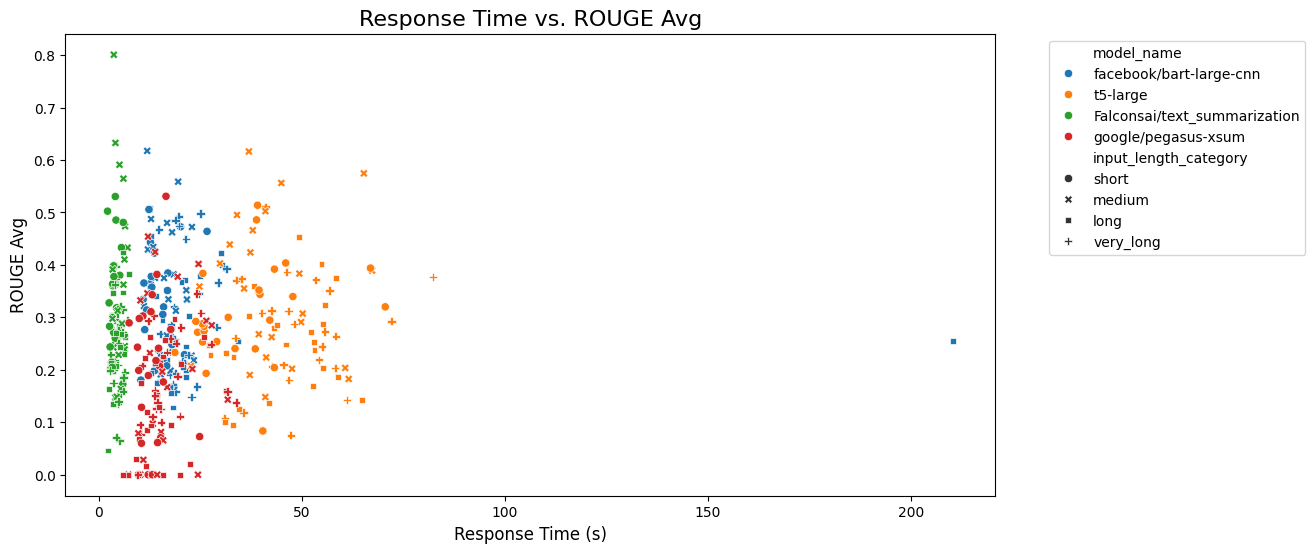

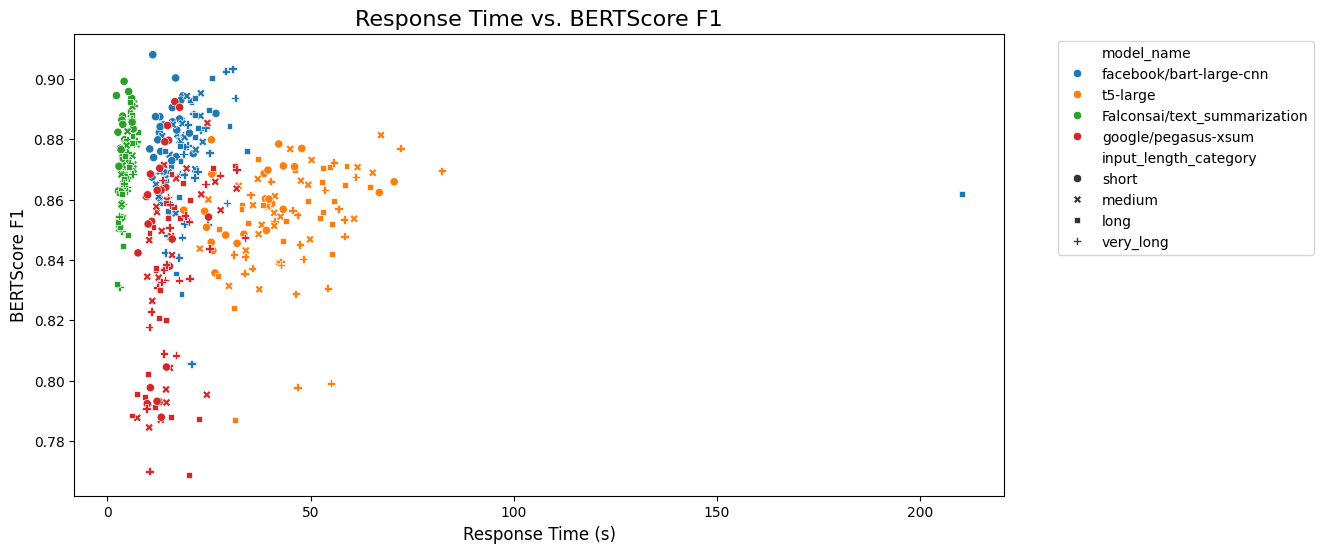

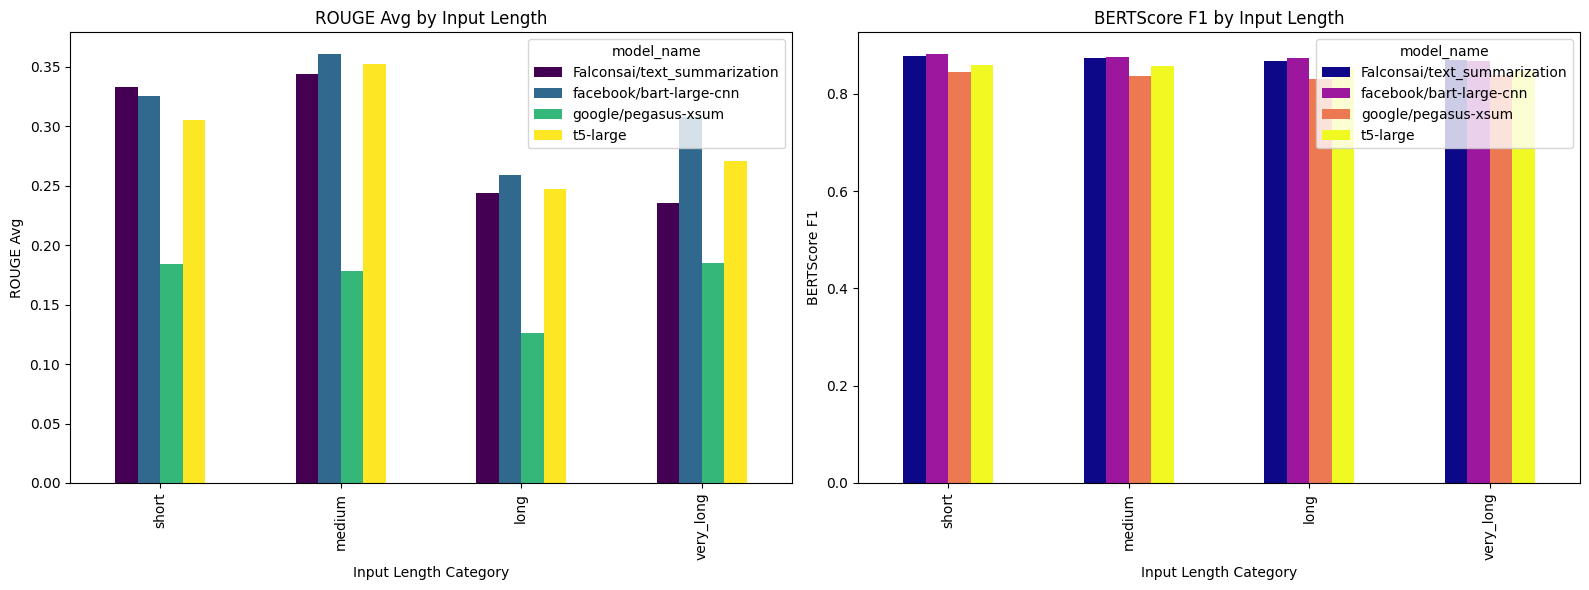

In [7]:
# (1) Average ROUGE and BERTScore F1 by Model
plt.figure(figsize=(12, 6))
df_results.groupby('model_name')[['rouge_avg', 'bertscore_f1']].mean().sort_values(by='rouge_avg').plot(kind='bar', figsize=(12, 6))
plt.title('Average ROUGE and BERTScore F1 by Model', fontsize=16)
plt.ylabel('Score', fontsize=12)
plt.xticks(rotation=45)
plt.show()

# (2) Response Time vs. ROUGE and BERTScore
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df_results, x='response_time', y='rouge_avg', hue='model_name', style='input_length_category', palette='tab10')
plt.title('Response Time vs. ROUGE Avg', fontsize=16)
plt.xlabel('Response Time (s)', fontsize=12)
plt.ylabel('ROUGE Avg', fontsize=12)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

plt.figure(figsize=(12, 6))
sns.scatterplot(data=df_results, x='response_time', y='bertscore_f1', hue='model_name', style='input_length_category', palette='tab10')
plt.title('Response Time vs. BERTScore F1', fontsize=16)
plt.xlabel('Response Time (s)', fontsize=12)
plt.ylabel('BERTScore F1', fontsize=12)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# (3) ROUGE and BERTScore by Input Length Category
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

rouge_by_length.T.plot(kind='bar', ax=axes[0], colormap='viridis', title='ROUGE Avg by Input Length')
axes[0].set_ylabel('ROUGE Avg')
axes[0].set_xlabel('Input Length Category')

bertscore_by_length.T.plot(kind='bar', ax=axes[1], colormap='plasma', title='BERTScore F1 by Input Length')
axes[1].set_ylabel('BERTScore F1')
axes[1].set_xlabel('Input Length Category')

plt.tight_layout()
plt.show()


### Step 4: Compare Metrics for Each Model


In [8]:
comparison_metrics = df_results.groupby('model_name')[['rouge_avg', 'bertscore_f1']].mean()
comparison_metrics['difference'] = comparison_metrics['bertscore_f1'] - comparison_metrics['rouge_avg']
print("\nMetric Comparison (ROUGE vs. BERTScore):")
print(comparison_metrics.sort_values(by='difference', ascending=False))


Metric Comparison (ROUGE vs. BERTScore):
                              rouge_avg  bertscore_f1  difference
model_name                                                       
google/pegasus-xsum            0.168331      0.838102    0.669771
Falconsai/text_summarization   0.288975      0.872252    0.583277
facebook/bart-large-cnn        0.313096      0.874975    0.561879
t5-large                       0.293649      0.854430    0.560781


In [9]:
df_results.original_text_word_count.max()

np.int64(1833)

In [10]:
df_results.original_text_word_count.min()

np.int64(199)

In [11]:
df_results.shape

(400, 15)

In [33]:
from transformers import AutoModel
import torch

# List of model checkpoints
model_list = [
    "facebook/bart-large-cnn",
    "t5-large",
    "Falconsai/text_summarization",
    "google/pegasus-xsum"
]

# Possible configuration fields for max input token length
typical_fields = ["max_position_embeddings", "n_positions", "seq_len", "seq_length", "n_ctx", "sliding_window"]

# Loop through each model and check for max input token length
for model_label in model_list:
    try:
        print(f"Checking model: {model_label}")
        
        # Clear any existing cache
        torch.cuda.empty_cache()
        
        # Load the model
        model = AutoModel.from_pretrained(model_label)
        
        # Check for max input token length in the model's configuration
        context_windows = [getattr(model.config, field) for field in typical_fields if field in dir(model.config)]
        
        if context_windows:
            print(f"Max input token length for {model_label}: {context_windows.pop()}")
        else:
            print(f"No max input token length found for {model_label}")
        
        # Clear the model from memory
        del model
        torch.cuda.empty_cache()  # Clear cache again after unloading the model
        
    except Exception as e:
        print(f"Error with model {model_label}: {e}")


Checking model: facebook/bart-large-cnn
Max input token length for facebook/bart-large-cnn: 1024
Checking model: t5-large
Max input token length for t5-large: 512
Checking model: Falconsai/text_summarization
Max input token length for Falconsai/text_summarization: 512
Checking model: google/pegasus-xsum


Some weights of PegasusModel were not initialized from the model checkpoint at google/pegasus-xsum and are newly initialized: ['model.decoder.embed_positions.weight', 'model.encoder.embed_positions.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Max input token length for google/pegasus-xsum: 512
